In [1]:
### Packages
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
### 출력 영상 크기
plt.rcParams["figure.figsize"] = (16,9)
### 한글 표시
plt.rcParams['font.family'] = "Gulim" 

1. 'obama.jpg' 영상에서 얼굴 영역을 제외한 부분을 블러링(blurring) 처리하시오. - 캐스케이드 파일: haarcascade_frontalface_alt2.xml -    
블러링: (15 × 15)

In [45]:
img_raw = cv2.imread(r"C:\Users\kr937\Desktop\drive\2023\Image Process\obama.jpg")
img_raw.shape

(1137, 910, 3)

In [46]:
### Package
from distutils.sysconfig import get_python_lib
### 캐스케이드 파일
cascade_file = get_python_lib() + r"\cv2\data\haarcascade_frontalface_alt2.xml"
cascade_file

'C:\\Users\\kr937\\anaconda3\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_alt2.xml'

In [47]:
### 캐스케이드 파일 읽기
cascade = cv2.CascadeClassifier(cascade_file)
### 그레이스케일로 변환
img_gs = cv2.cvtColor(img_raw, cv2.COLOR_BGR2GRAY)
### 얼굴 검출
face_list = cascade.detectMultiScale(img_gs, minSize = (30, 30))

In [48]:
### 얼굴 검출 좌표 - [x, y, w, h]
face_list

array([[353, 101, 279, 279]])

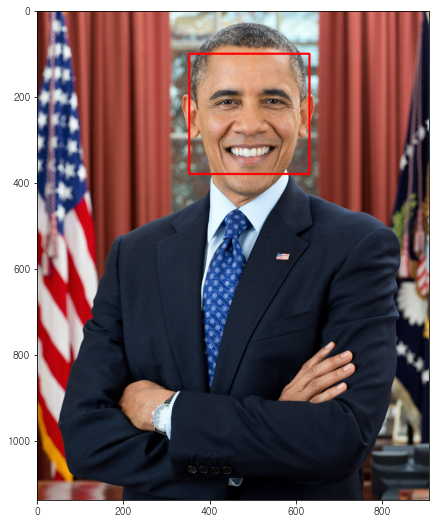

In [49]:
img_out = img_raw.copy()
### 색상 - red
color = (0, 0, 255)
for face in face_list :
    x, y, w, h = face
    cv2.rectangle(img_out, (x, y), (x+w, y+h), color, thickness = 3)
    ### RGB로 변환 후 이미지 출력
    plt.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))
    plt.show()

In [78]:
img_face = img_raw.copy()
for face in face_list :
    x, y, w, h = face
    x1, y1, x2, y2 = x, y, x+w, y+h
    w = x2 - x1
    h = y2 - y1
    img_face = cv2.resize(img_face[y1:y2, x1:x2], (w, h), 
                                   interpolation = cv2.INTER_AREA)
img_face = cv2.resize(img_face,(w,h), interpolation = cv2.INTER_AREA)
img_blur[y1:y2, x1:x2] = cv2.resize(img_face, (w, h), 
                                   interpolation = cv2.INTER_AREA)


ValueError: could not broadcast input array from shape (279,279,3) into shape (178,0,3)

In [74]:
img_blur.shape

(279, 279, 3)

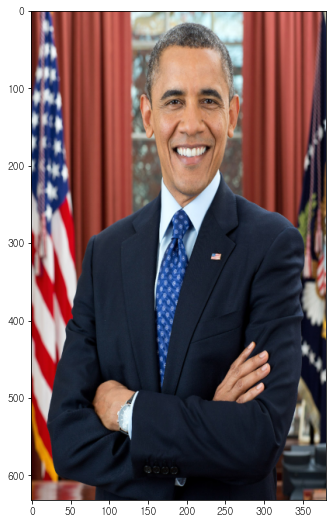

In [35]:
img = img_raw.copy()
### 색상 - red
color = (0, 0, 255)
for face in face_list :
    x, y, w, h = face
    img_face = cv2.resize(img, (y+h, x+w), interpolation = cv2.INTER_AREA)
    ### RGB로 변환 후 이미지 출력
    plt.imshow(cv2.cvtColor(img_face, cv2.COLOR_BGR2RGB))
    plt.show()

In [15]:
mask = np.ones((15, 15)) / (15**2)
img_blur = cv2.blur(img_raw, (15, 15))
img_1 = cv2.filter2D(img_raw, -1, mask)

In [10]:
### 영상 출력 함수
def fn_imshow(img, axis='off'):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    if axis=='off': plt.axis('off')
    plt.show()

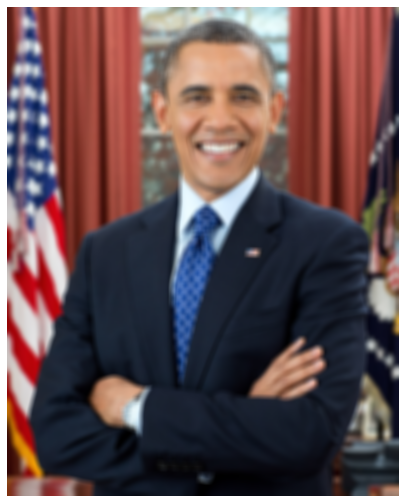

In [17]:
fn_imshow(img_blur)

In [44]:
face_list

array([[353, 101, 279, 279]])

In [43]:
### 이미지 복사
img_out = img_raw.copy()
### 모자이크 처리
for x, y, w, h in face_list :
    ### 이미지 삽입
    img_1 = fn_mosaic(img_out, (x, y, x+w, y+h))
    ### RGB로 변환 후 이미지 출력
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
plt.show()

ValueError: not enough values to unpack (expected 4, got 1)

In [ ]:
img_out.shape

In [42]:
def fn_mosaic (img, rect) :
    x1, y1, x2, y2 = face_list
    w = x2 - x1
    h = y2 - y1
    img_small = cv2.resize(img_out[y1:y2, x1:x2], (w, h))
    img_blur[y1:y2, x1:x2] = cv2.resize(img_small, (w, h), 
                                    interpolation = cv2.INTER_AREA)
    return img

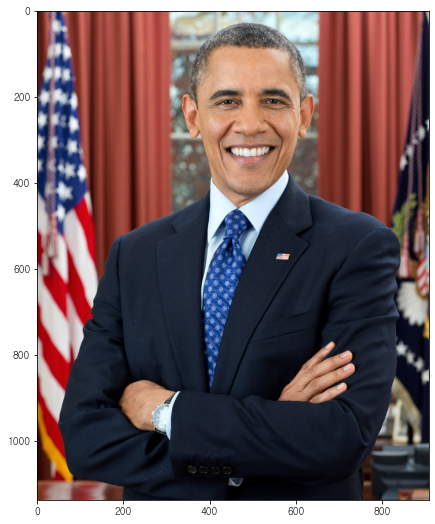

In [38]:
### 이미지 복사
img_out = img_raw.copy()
### 모자이크 처리
for x, y, w, h in face_list :
    ### 이미지 삽입
    img_out = fn_mosaic(img_out, (x, y, x+w, y+h))
    ### RGB로 변환 후 이미지 출력
plt.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
x, y, w, h = face_list
img_small = cv2.resize(img[y1:y2, x1:x2], (size, size))
img[y1:y2, x1:x2] = cv2.resize(img_small, (w, h), interpolation = cv2.INTER_AREA)